# HOMEWORK 5 ADM 

**Authors:**

In [143]:
data = {'Name': ['Ramona Tarantino', 'Nicola Grieco', 'Michela Lombardi', 'Gianmarco Fiorenza'],
        'Matricula': [2082006, 2081607 , 2095974 , 2086296],
        'Email': ['ramonatarantino00@gmail.com', 'grieco.2081607@studenti.uniroma1.it', 'lombardi.2095974@studenti.uniroma1.it', 'giammafiore@gmail.com']}

In [144]:
data = pd.DataFrame(data)


In [145]:
display(data)

,Name,Matricula,Email
0,Ramona Tarantino,2082006,ramonatarantino00@gmail.com
1,Nicola Grieco,2081607,grieco.2081607@studenti.uniroma1.it
2,Michela Lombardi,2095974,lombardi.2095974@studenti.uniroma1.it
3,Gianmarco Fiorenza,2086296,giammafiore@gmail.com


#### The libraries we used:

In [9]:
import networkx as nx
import pickle
import pandas as pd
from networkx import NetworkXError
import matplotlib.pyplot as plt
from collections import defaultdict
import community as com
import matplotlib.patches as patches
from secrets import token_hex
from matplotlib.patches import Patch


## Dataset

In [21]:
edges_df = pd.read_csv("edges.csv")
edges_df

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
hero_network = pd.read_csv('hero-network.csv')
hero_network 

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
nodes = pd.read_csv('nodes.csv')
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


# 1. Data

### DATA PREPROCESSING
- Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
- Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
- The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.


In [ ]:
import csv
import re

# Read the hero-network.csv file
with open('hero-network.csv', 'r') as f:
    reader = csv.reader(f)
    
    # Create a new list to hold the cleaned data
    cleaned_data = []
    for row in reader:
        # Use a regular expression to remove the extra spaces from the names
        # in the row
        cleaned_row = [re.sub(r' +', '', name) for name in row]
        
        
        # Add the cleaned row to the list
        cleaned_data.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('hero-network-cleaned.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(cleaned_data)

In [ ]:
# find the names that appear in both sets of names
import pandas as pd
df1 = pd.read_csv('hero-network-cleaned.csv')

# read the second dataset into a dataframe
df2 = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in the first dataset
hero_names1 = set(df1['hero1']) | set(df1['hero2'])

# create a set of hero names from the hero column in the second dataset
hero_names2 = set(df2['hero'])

common_names = df1[df1['hero1'].isin(hero_names2) | df1['hero2'].isin(hero_names2)]

# print the common names
print(common_names)

common_names.count()


In [ ]:
# read the hero-network.csv file into a dataframe
import pandas as pd
hero_network_df = pd.read_csv('hero-network.csv')

# read the edges.csv file into a dataframe
edges_df = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in hero-network.csv
hero_network_names = set(hero_network_df['hero1']) | set(hero_network_df['hero2'])

# create a set of hero names from the hero column in edges.csv
edges_names = set(edges_df['hero'])

# find the names that appear in hero-network.csv but not in edges.csv
# and remove any extra spaces and the extra '/' from the end of the names
missing_names = [name.strip()[:-1] for name in hero_network_names - edges_names if name[-1] == '/']

# update the names in hero-network.csv to match the names in edges.csv
hero_network_df.loc[hero_network_df['hero1'].isin(missing_names), 'hero1'] = missing_names
hero_network_df.loc[hero_network_df['hero2'].isin(missing_names), 'hero2'] = missing_names

# write the updated dataframe to a new csv file
hero_network_df.to_csv('hero-network-corrected.csv', index=False)


In [ ]:
print(missing_names)

In [ ]:
hero_network_df_corrected = pd.read_csv('hero-network-corrected.csv')
hero_network_df_corrected 

In [ ]:
# load the dataset into a pandas DataFrame
hero_network_df_corrected = pd.read_csv('hero-network.csv')

# replace the string 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER' in columns 'hero1' and 'hero2'
hero_network_df_corrected['hero1'] = hero_network_df_corrected['hero1'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')
hero_network_df_corrected['hero2'] = hero_network_df_corrected['hero2'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')

# save the modified DataFrame to a new CSV file
hero_network_df_corrected.to_csv('modified-hero-network.csv', index=False)


In [7]:
df = pd.read_csv('modified-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


- Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

In [ ]:
df_subset = df[df['hero1'] != df['hero2']]
# save the new DataFrame to a new CSV file
df_subset.to_csv('final-hero-network.csv', index=False)

In [ ]:
df = pd.read_csv('final-hero-network.csv')
df

In [9]:
count = df[df['hero1'] == df['hero2']].shape[0]

# print the count
print(count)

#OK IT WORKS, there's not the duplicate rows

0


In [17]:
df = df[df['hero1'] != df['hero2']]

In [19]:
df.to_csv('final-hero-network2.csv', index=False)

In [10]:
df = pd.read_csv('final-hero-network2.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


#### 'final-hero-network2.csv' is the final dataset preprocessed

### Graphs setup

**First graph** : Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.



In [3]:
data_df = pd.read_csv('final-hero-network2.csv')

# Group the data by hero1 and hero2, and calculate the total number of collaborations between each pair
edge_df = data_df.groupby(['hero1', 'hero2']).size().reset_index(name='collaborations')

# Create an empty graph object
G = nx.Graph(weighted=True, directed=False)

# Add edges to the graph
for i, row in edge_df.iterrows():
    hero1 = row['hero1']
    hero2 = row['hero2']
    collaborations = row['collaborations']
    
    # Calculate the weight of the edge using the inverse of the total number of collaborations
    weight = 1 / collaborations
    
    # Add the edge to the graph
    G.add_edge(hero1, hero2, weight=weight)




In [308]:
nx.info(G)

'Graph with 6426 nodes and 167207 edges'

In [317]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6426
Number of edges: 167207


In [16]:
for u, v, weight in G.edges(data='weight'):
    if 'weight' not in G.nodes[u]:
        G.nodes[u]['weight'] = weight
    else:
        G.nodes[u]['weight'] += weight
    if 'weight' not in G.nodes[v]:
        G.nodes[v]['weight'] = weight
    else:
        G.nodes[v]['weight'] += weight


### SECOND GRAPH

In [22]:
import pandas as pd
import networkx as nx

# Read the nodes data from nodes.csv into a DataFrame
nodes_df = pd.read_csv('nodes.csv')

# Read the edges data from edges.csv into a DataFrame
edges_df = pd.read_csv('edges.csv')

# Create a graph from the edges DataFrame
G2 = nx.from_pandas_edgelist(edges_df, 'hero', 'comic')

# Set the node type as an attribute of the nodes in the graph
nodes_df = nodes_df.set_index('node')
node_types = nodes_df['type']
nx.set_node_attributes(G2, node_types, 'type')


In [91]:
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

This code will create an undirected, unweighted graph with nodes for each hero and comic in the data, and edges between heroes and comics indicating which heroes appear in which comics. The node type (hero or comic) will be stored as an attribute of the node.

### Save the two graphs in a pickle files 

In [318]:
# Save the graph to a file using pickle
with open('graph1.pickle', 'wb') as f:
    pickle.dump(G, f)
    
with open('graph2.pickle', 'wb') as f:
    pickle.dump(G2, f)
    

In [11]:
with open('graph1.pickle', 'rb') as f:
    G1 = pickle.load(f)


In [35]:
nx.info(G1)

'Graph with 6426 nodes and 167207 edges'

In [12]:
with open('graph2.pickle', 'rb') as f:
    G2 = pickle.load(f)

In [37]:
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

## 2. Backend Implementation

Definition: As the number of nodes and edges grows, we may request to work on a subset of the data to reduce computation time and improve network visualization. In this case, we will ask you only to consider the data for top N heros. We define the top N heroes as follows:
- **Top N heroes**: The **top N heroes who have appeared in the most number of comics**. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

The goal of this part is the implementation of a controller system that has different functionalities. The controller should take as input an identifier "i" and run the associated function_i applied to the graph you create from the downloaded data.

### **This code take as input an identifier "i" and run the associated function_i applied to the graph you create from the downloaded data**


**There's an example with i = 1 -> Run the functionality 1**

In [141]:
# Create a dictionary mapping the identifier i to the function function_i
functions = {
    1: functionality_1,
    2: functionality_2,
    3: functionality_3,
    4: functionality_4,
    5: functionality_5
}

In [93]:
# Read the identifier i from the user
i = int(input('Enter an identifier: '))
# Look up the function corresponding to the identifier i
func = functions[i]
# Execute the function on the graph
func(G1, 1, N= 20)


Enter an identifier: 1


{'BEAST/HENRY &HANK& P': {'collaborations': 473.0},
 'CAPTAIN AMERICA': {'collaborations': 883.0},
 'CYCLOPS/SCOTT SUMMER': {'collaborations': 419.0},
 'DAREDEVIL/MATT MURDO': {'collaborations': 284.0},
 'HAWK': {'collaborations': 516.0},
 'HULK/DR. ROBERT BRUC': {'collaborations': 389.0},
 'HUMAN TORCH/JOHNNY S': {'collaborations': 1138.0},
 'JAMESON, J. JONAH': {'collaborations': 407.0},
 'MR. FANTASTIC/REED R': {'collaborations': 1112.0},
 'SPIDER-MAN/PETER PARKER': {'collaborations': 738.0},
 'THING/BENJAMIN J. GR': {'collaborations': 1175.0},
 'THOR/DR. DONALD BLAK': {'collaborations': 678.0},
 'number_of_nodes': 12,
 'density': 1.0,
 'degree_distribution': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12],
 'avg_degree': 11.0,
 'hubs': ['BEAST/HENRY &HANK& P',
  'DAREDEVIL/MATT MURDO',
  'THOR/DR. DONALD BLAK',
  'CAPTAIN AMERICA',
  'SPIDER-MAN/PETER PARKER',
  'HAWK',
  'CYCLOPS/SCOTT SUMMER',
  'HUMAN TORCH/JOHNNY S',
  'HULK/DR. ROBERT BRUC',
  'THING/BENJAMIN J. GR',
  'JAMESON, J. JONA

### Another trial with the controll applying functionality_5

In [142]:
# Read the identifier i from the user
i = int(input('Enter an identifier: '))
# Execute the function on the graph
func(G1, 80, 'THING/BENJAMIN J. GR','HUMAN TORCH/JOHNNY S' )


Enter an identifier: 5
Hero_1 and Hero_2 do not belong to the same community


(1816,
 defaultdict(list,
             {4: ['NORRISS, SISTER BARB',
               'HUMAN TORCH/JOHNNY S',
               'CANNONBALL II/SAM GU',
               'SUNSPOT/ROBERTO DACO',
               'HAWK',
               'ROBERTSON, JOE',
               'VOLSTAGG',
               'SUB-MARINER/NAMOR MA',
               'SHE-HULK/JENNIFER WA',
               'HERCULES [GREEK GOD]',
               'SUMMERS, NATHAN CHRI'],
              3: ['SPIDER-MAN/PETER PARKER',
               'WONDER MAN/SIMON WIL',
               'MR. FANTASTIC/REED R',
               'CRYSTAL [INHUMAN]',
               'BANNER, BETTY ROSS T',
               'IRON MAN IV/JAMES R.',
               'SIF',
               'MARVEL GIRL/JEAN GRE',
               'ODIN [ASGARDIAN]',
               'DUGAN, TIMOTHY ALOYI',
               'CAGE, LUKE/CARL LUCA',
               'IRON FIST/DANIEL RAN',
               'NELSON, FRANKLIN FOG',
               'QUICKSILVER/PIETRO M',
               'RICHARDS, FRANKLIN B',
        

## Functionality 1 - extract the graph's features
Input:

- The graph data
- The graph type (ex., number 1 or number 2)
- N: denoting the top N heroes that their data should be considered

Output:

- The number of nodes in the network (if type 2, report for both node types)
- The number of collaborations of each superhero with the others (only if type 1)
- The number of heroes that have appeared in each comic (only if type 2)
- The network's density
- The network's degree distribution
- The average degree of the network
- The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution) Whether the Network is sparse or dense

In [139]:
def my_number_of_nodes(G):
    return len(G.nodes)
def adjacent_edges(G, node):
    # Initialize an empty list to store the adjacent edges
    adjacent_edges = []
    # Iterate over all the edges in the graph
    for u, v in G.edges():
        # If the node is the source or target of the edge, add it to the list of adjacent edges
        if u == node or v == node:
            adjacent_edges.append((u, v))
    # Return an iterator over the adjacent edges
    return iter(adjacent_edges)
def my_neighbors(G, node):
    # Initialize a set to store the neighbors
    neighbors = set()
    # Iterate over the edges adjacent to the node
    for n1, n2 in adjacent_edges(G,node):
        # If the node is the source of the edge, add the target to the set of neighbors
        if n1 == node:
            neighbors.add(n2)
        # If the node is the target of the edge, add the source to the set of neighbors
        elif n2 == node:
            neighbors.add(n1)
    # Convert the set to a list and return it
    return list(neighbors)
def my_density(G):
    num_nodes = len(G.nodes)
    num_edges = len(G.edges)
    if num_nodes == 0 or num_nodes == 1:
        return 0
    return num_edges / (num_nodes * (num_nodes - 1) / 2)
def my_degree_histogram(G):
    degrees = [len(G[node]) for node in G.nodes]
    max_degree = max(degrees)
    histogram = [0] * (max_degree+1)
    for d in degrees:
        histogram[d] += 1
    return histogram
def my_degree(G):
    # Initialize a dictionary to store the degrees of the nodes
    degrees = {}
    # Iterate over all the nodes in the graph
    for node in G.nodes():
        # Find the neighbors of the node
        neighbors = list(my_neighbors(G, node))
        # Store the degree of the node in the dictionary
        degrees[node] = len(neighbors)
    # Return the dictionary of degrees
    return degrees

In [159]:
edges_df =  pd.read_csv("edges.csv")

In [140]:
def functionality_1(G, graph_type, N=None):
    features={}
  # graph_type should be either 1 or 2
  # N is the top N heroes that should be considered (if not provided, consider all heroes)

  # if N is not provided, consider all heroes in the graph
    if N is None:
        G_sub = G
    else:
        G_sub = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                         list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared 

  # now we can use the G_sub graph to compute the desired statistics

    if graph_type == 1:
    
        # Iterate over the edges in the graph
        for source, target, weight in G_sub.edges(data='weight'):
            # Calculate the number of collaborations as the reciprocal of the weight
            collaborations = 1 / weight

            # Update the collaborations count for the source node
            if source in features:
                features[source]['collaborations'] += collaborations
            else:
                features[source] = {'collaborations': collaborations}

            # Update the collaborations count for the target node
            if target in features:
                features[target]['collaborations'] += collaborations
            else:
                features[target] = {'collaborations': collaborations}
#source and target are variables that are being used to represent the nodes at the endpoints of an edge in a graph.      
# for loop iterates over the edges in the graph and assigns the source node to the variable source, the target node to the variable target, and the weight of the edge to the variable weight.      
    
        num_nodes = G_sub.number_of_nodes()
        features['number_of_nodes'] = num_nodes


    elif graph_type == 2:
        # Get the node types (hero or comic) of all the nodes in the graph
        node_types = nx.get_node_attributes(G_sub, 'type')

        # Initialize dictionaries to track the number of heroes that have appeared in each comic
        hero_appearances = {}
        comic_appearances_total = {}

        # Iterate over the nodes in the graph
        for node, node_type in node_types.items():
            # Count the number of neighbors of the node
            num_neighbors = len(list(G_sub.neighbors(node)))
            if node_type == 'hero':  # If the node is a hero node
                # Add the count of its neighbors to the dictionary that tracks the number of heroes that have appeared in each comic
                hero_appearances[node] = num_neighbors
            else:  # If the node is a comic node
                # Add the count of its neighbors to the dictionary that tracks the number of heroes that have appeared in each comic
                comic_appearances_total[node] = num_neighbors

        features['hero_appearances'] = hero_appearances
        features['comic_appearances_total'] = comic_appearances_total
        
        
        # Get the node types (hero or comic) of all the nodes in the graph
        node_types = nx.get_node_attributes(G_sub, 'type')

        # Initialize counters for the number of hero and comic nodes
        num_hero_nodes = 0
        num_comic_nodes = 0

        # Iterate over the nodes in the graph
        for node, node_type in node_types.items():
            if node_type == 'hero':  # If the node is a hero node
                num_hero_nodes += 1  # Increment the counter for hero nodes
            else:  # If the node is a comic node
                num_comic_nodes += 1  # Increment the counter for comic nodes

        
        features['Number of hero nodes'] = num_hero_nodes
        features['Number of comic nodes'] = num_comic_nodes


    # compute the network's density
    density = nx.density(G_sub)
    features['density'] = density 
    
    #The network's degree distribution
    degree_distribution = nx.degree_histogram(G_sub)
    features['degree_distribution'] = degree_distribution
    
    # Get the average degree of the network
    degrees = dict(G_sub.degree())
    avg_degree = sum(degrees.values()) / len(degrees)
    features['avg_degree'] = avg_degree

    # Get the network's Hubs (nodes with degree greater than 95th percentile of degree distribution)
    # Sort the degrees in descending order
    sorted_degrees = sorted(degrees.values(), reverse=True)

    # Compute the 95th percentile of the degree distribution
    pctile = np.percentile(sorted_degrees, 95)

    # Identify the hubs as the nodes with degrees greater than or equal to the 95th percentile
    hubs = [node for node, degree in degrees.items() if degree >= pctile]
    features['hubs'] = hubs
    
    # Determine if the network is sparse or dense
    if density < 0.1:
        sparsity = "sparse"
    else:
        sparsity = "dense"
    features['network_type'] = sparsity
    
 
    return(features)


## Functionality 2 - Find top superheroes!

Input:

- The graph data
- A node (hero or comic)
- One of the given metrics : Betweeness 1, PageRank, ClosenessCentrality 3, DegreeCentrality
- N: denoting the top N heroes that their data should be considered

Output:

- The metric's value over the considered graph
- The given node's value
**Note**: Give an explanation regarding the features of the user based on all of the metrics (e.g. if the betweenness metric is high, what does this mean in practice, what if the betweenness is low but has a high PageRank value, etc.).

In graph analytics, **Centrality** is a very important concept in identifying important nodes in a graph. It is used to measure the importance (or “centrality” as in how **“central”** a node is in the graph) of various nodes in a graph. Now, each node could be **important** from an angle depending on **how “importance”** is defined. Centrality comes in different flavors and each flavor or a metric defines importance of a node from a different perspective and further provides relevant analytical information about the graph and its nodes.

### **measures of centrality :**


- **Betweeness Centrality :** measures the number of times a node lies on the shortest path between other nodes. It shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one and it is used for finding the individuals who influence the flow around a system.

- **PageRank :** PageRank is a variant of EigenCentrality, also assigning nodes a score based on their connections, and their connections’ connections. The difference is that PageRank also takes link direction and weight into account – so links can only pass influence in one direction, and pass different amounts of influence. This measure uncovers nodes whose influence extends beyond their direct connections into the wider network.

- **Closeness Centrality :** Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network. This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. It is used for finding the individuals who are best placed to influence the entire network most quickly. Closeness Centrality can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. 

- **Degree centrality :** Degree centrality assigns an importance score based simply on the number of links held by each node. It tells us how many direct, ‘one hop’ connections each node has to other nodes in the network. It is used for finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.


In [100]:
# Define the functions for the different functionalities
def functionality_2(G, node, metric, N = None):
    '''
    Input:

    - The graph data
    - A node (hero or comic)
    - One of the given metrics : Betweeness 1, PageRank, ClosenessCentrality 3, DegreeCentrality
    - N: denoting the top N heroes that their data should be considered


    Output:
        A tuple cointaining:
        
        - The metric's value over the considered graph (first element)
        - The given node's value                       (second element)
    '''
    

    flag = True
    
    if not N:
        sub_G = G
    else:
        sub_G = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                         list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared 

    if node not in sub_G.nodes():
        flag = False
    
    if metric.lower() == "betweeness":   # check of betweeness metric
        df = pd.DataFrame.from_dict(nx.betweenness_centrality(sub_G, weight = "weight"), orient='index',                 # compute and store betweeness for all node in descending order
                           columns=['betweenness']).sort_values(by='betweenness', ascending=False)  # to visualize first the most relevant in terms of betweeness 
    
    elif metric.lower() == "pagerank":   # check of pagerank metric
        df = pd.DataFrame.from_dict(nx.pagerank(sub_G, weight = "weight"), orient='index',                            # compute and store betweeness for all node in descending order
                           columns=['pagerank']).sort_values(by='pagerank', ascending=False)   # to visualize first the most relevant in terms of pagerank 
        
    
    elif metric.lower() == "closenesscentrality":    # check of closenesscentrality metric     # compute and store betweeness for all node in descending order
        df = pd.DataFrame.from_dict(nx.closeness_centrality(sub_G), orient='index',                # to visualize first the most relevant in terms of closenesscentrality
                           columns=['closeness_centrality']).sort_values(by='closeness_centrality', ascending=False)
    
    
    elif metric.lower() == "degreecentrality":        # check of degreecentrality metric
        df = pd.DataFrame.from_dict(nx.degree_centrality(sub_G), orient='index',                                    # compute and store betweeness for all node in descending order
                           columns=['degree_centrality']).sort_values(by='degree_centrality', ascending=False)   # to visualize first the most relevant in terms of degreecentrality
    else:
        raise Exception("Sorry, this metric is no valid")
    
    return (df, df[df.index == node] if flag else 'NA')
    


#### Let's try function2 on the first graph, node of CAPTAIN AMERICAN, all metrics and N = 100

In [101]:
functionality_2(G1, 'CAPTAIN AMERICA', "betweeness", 100)[0].head(5)

,betweenness
CAPTAIN AMERICA,0.564103
BEAST/HENRY &HANK& P,0.295034
SPIDER-MAN/PETER PARKER,0.221681
CYCLOPS/SCOTT SUMMER,0.183382
THOR/DR. DONALD BLAK,0.163908


These are the five nodes with highest betweenness centrality, it means that these nodes are interesting because they lie on communication paths and can control information flow. 

In [102]:
functionality_2(G1, 'CAPTAIN AMERICA', "pagerank", 100)[0].head(5)

,pagerank
CAPTAIN BRITAIN/BRIA,0.018988
IRON FIST/DANIEL RAN,0.018116
"CAGE, LUKE/CARL LUCA",0.017541
"NELSON, FRANKLIN FOG",0.016655
WONG,0.016605


These are the five nodes with highest pagerank centrality. A node is important if it linked from other important and link parsimonious nodes or if it is highly linked, we can say that these nodes are the most important in terms of connections.

In [103]:
functionality_2(G1, 'CAPTAIN AMERICA', "closenesscentrality", 100)[0].head(5)

,closeness_centrality
CYCLOPS/SCOTT SUMMER,1.0000
HUMAN TORCH/JOHNNY S,1.0000
MR. FANTASTIC/REED R,1.0000
CAPTAIN AMERICA,1.0000
THING/BENJAMIN J. GR,0.9875


These are the five nodes with highest closeness centrality, that is a useful measure that estimates how fast the flow of information would be through a given node to other nodes. We can say that these nodes are the ones where information passes the fastest.

In [104]:
functionality_2(G1, 'CAPTAIN AMERICA', "degreecentrality", 100)[0].head(5)

,degree_centrality
CYCLOPS/SCOTT SUMMER,1.000000
HUMAN TORCH/JOHNNY S,1.000000
MR. FANTASTIC/REED R,1.000000
CAPTAIN AMERICA,1.000000
THING/BENJAMIN J. GR,0.987342


These are the five nodes with highest degree centrality. It can be thought of as a kind of popularity measure, but a crude one that does not recognize a difference between quantity and quality. These are the nodes that can quickly connect with the wider network.

In [105]:
Cap_bet = functionality_2(G1, 'CAPTAIN AMERICA', "betweeness", 100)[1]
Cap_pag = functionality_2(G1, 'CAPTAIN AMERICA', "pagerank", 100)[1]
Cap_clo = functionality_2(G1, 'CAPTAIN AMERICA', "closenesscentrality", 100)[1]
Cap_deg = functionality_2(G1, 'CAPTAIN AMERICA', "degreecentrality", 100)[1]

In [106]:
cap_result = pd.DataFrame(data = [[round(Cap_bet.betweenness[0],4), round(Cap_pag.pagerank[0],4), round(Cap_clo.closeness_centrality[0],4), round(Cap_deg.degree_centrality[0],4)]], columns = ['betweeness', 'pagerank','closenesscentrality', 'degreecentrality'])

In [107]:
cap_result.index = ["CAPTAIN AMERICA"]

In [108]:
cap_result

,betweeness,pagerank,closenesscentrality,degreecentrality
CAPTAIN AMERICA,0.5641,0.0069,1.0,1.0


We have reported all measures of centrality for the required node, namely the hero captain america, and we can state by also looking at the previous results that it always ranks high in terms of centrality, consequently it is definitely one of the most important nodes within the graph.

## Functionality 3 - Shortest ordered Route
Input:
- The graph data
- A sequence of superheroes h = [h_2, ..., h_n-1]
- Initial node h_1 and an end node h_n
- N: denoting the top N heroes that their data should be considered

Output:
- The shortest walk of comics that you need to read to get from hero_1 to hero_n

In [4]:
# create 2 lists of all the heros and all the comics from the second graph
G2_type = list(G2.nodes(data='type'))
G2_h = []
G2_c = []
for x in G2_type:
    if x[1] == 'hero':
        G2_h.append(x[0])
    else:
        G2_c.append(x[0])

In [5]:
# create a random list of n heros from G2_h(the list of all 
# heroes of the second graph) for run the Functionality 3
# and create h_1 and h_n random too 
import random 
random.seed(114) #reproducibitily
n = 5 # length of the list 
i = 0 
h = []
while i < n+2:
    x = random.choice(G2_h)
    if x not in h:
        h.append(x)
        i += 1


h_1 = h[len(h)-1]
h_n = h[len(h)-2]
h.pop()
h.pop()
print(h,h_1,h_n)

['FREDERICKS, GENERAL', 'REISZ, RAY', 'BYRD, NATHANIEL ALEX', 'JOHNNY APPLESEED/JON', 'STORM 2013'] SINTARIIS FUJIKAWA, KENJIRO


In [9]:
# function to merge a list of lists into a single list
def flatten(l):
    return [i for sublist in l for i in sublist]


# Dijkstra metod, to find the shortest path between two nodes: s, g
def dijkstra(G, s, g):
    S_P= {s: (None, 0)}
    current = s
    visited = set()

    while current != g:
        visited.add(current)
        destinations = list(G[current])
        dist_to_current = S_P[current][1] 

        for next in destinations:
            dist = 1 + dist_to_current  
            if next not in S_P:
                S_P[next] = (current, dist)
            else:
                S_dist_current = S_P[next][1]
                if S_dist_current > dist:
                    S_P[next] = (current, dist)

        next_destinations = {node: S_P[node] for node in S_P if node not in visited}
        if not next_destinations: return None
        current = min(next_destinations, key=lambda x: next_destinations[x][1])

    final_P =[]
    while current is not None:
        final_P.append(current)
        next = S_P[current][0]
        current = next
    final_P = final_P[::-1]
    return final_P


# actual funcionality
def functionality_3(G, h_1, h_n, h, N = None):
    F_P = []
    if N is None:
        G_sub = G
    else:
        G_sub = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +   
                         list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))

    if h_1 not in G_sub or h_n not in G_sub : return 'there is no such path'
    for hero in h: 
        if hero not in G_sub : return 'there is no such path'
    dij_1 = dijkstra(G_sub, h_1, h[0])
    if dij_1 is None: return 'there is no such path'
    else: F_P.append(dij_1[:-1])

    for i in range(len(h)-1):
        dij_i = dijkstra(G_sub, h[i], h[i+1])
        if dij_i is None: return 'there is no such path'
        else: F_P.append(dij_i[:-1])
    
    dij_n = dijkstra(G_sub, h[-1], h_n)
    if dij_n is None: return 'there is no such path'
    else: F_P.append(dij_n)
    F_P = flatten(F_P)

    F_comics_P = [x for x in F_P if x in G2_c]

    print(F_comics_P)

    G2_sub_plot = nx.subgraph(G2, F_P)
    # Draw the graph
    plt.figure(figsize=(11, 11))
    pos = nx.spring_layout(G2_sub_plot)
    nx.draw_networkx_nodes(G2_sub_plot, pos, node_size=600 ,node_color='lightblue')
    nx.draw_networkx_edges(G2_sub_plot, pos, width=2, edge_color='lightgray')
    nx.draw_networkx_labels(G2_sub_plot, pos, font_size=10, font_color='darkblue')

    # Highlight the path by drawing it on top of the other edges from the F_P list
    nx.draw_networkx_edges(G2_sub_plot, pos, edgelist=[(F_P[i], F_P[i+1]) for i in range(len(F_P)-1)], width=3, edge_color='black')

    # Add labels to the edges in the path
    edge_labels = {(F_P[i], F_P[i+1]): (i+1) for i in range(len(F_P)-1)}
    nx.draw_networkx_edge_labels(G2_sub_plot, pos, edge_labels=edge_labels, font_size=8, font_color='black')
    # Show the plot
    plt.show()
    return  F_P, F_comics_P


## Functionality 4 - Disconnecting Graphs
#### Input:

- The graph data
- heroA: a superhero to which will relate sub-graph G_a
- heroB: a superhero to which will relate sub-graph G_b
- N: denoting the top N heroes that their data should be considered
#### Output:

- The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

A graph is disconnected if at least two vertices of the graph are not connected by a path. If a graph G is disconnected, then every maximal connected subgraph of G is called a connected component of the graph G.

The functionality 4 after the application of Top N heroes subgraph creation, it checks if heroA and heroB are present in the dataframe of hero pairs, and if they are, it finds their indices in the graph. If either hero is not present in the graph, the function prints an error message and returns None.

If both heroes are present in the graph, the function uses the minimum_edge_cut function from NetworkX to find the minimum set of edges that need to be cut in order to disconnect heroA and heroB in the graph. It then removes these edges from the graph and finds the connected components of the resulting graph. Finally, it creates a list of subgraphs for each connected component and returns this list, as well as the number of cut edges.

In [19]:
def functionality_4(G, heroA, heroB, N):
    # N is the top N heroes that should be considered (if not provided, consider all heroes)
    # if N is not provided, consider all heroes in the graph
    if N is None:
        G_sub = G
    else:
        G_sub = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                            list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared

    # Check if heroA and heroB are in the dataframe
    if df_hero['hero1'].isin([heroA]).any() or df_hero['hero2'].isin([heroB]).any():
    # Find the indices of heroA and heroB in the graph
        heroA_index = None
        heroB_index = None
        for index, node in enumerate(G_sub.nodes()):
            if node == heroA:
                heroA_index = index
            if node == heroB:
                heroB_index = index

    # Check if heroA and heroB are present in the subgraph
    if heroA_index is not None and heroB_index is not None:
        G_sub_copy = G_sub.copy()
        try:
            #nx.minimum_edge_cut function returns the minimum set of edges that, if removed from the graph,taking in consideration edges' weights would make it disconnected.
            cut_edges = nx.minimum_edge_cut(G_sub_copy, heroA, heroB)
            cut_value = len(cut_edges)

            # Remove the cut edges from the graph to obtain the two subgraphs
            G_sub_copy.remove_edges_from(cut_edges)
            # Find the connected components of the graph
            components = nx.connected_components(G_sub_copy)

            # Create a list of subgraphs for each connected component
            subgraphs = [G_sub_copy.subgraph(component) for component in components]

            # You can now access the subgraphs using indices
            g_a = subgraphs[0]
            g_b = subgraphs[1]

        except NetworkXError: #catching the error if heroes are not in the graph
            print("One of the heroes is not present in the graph")

    else:
        print("Invalid heroes")

    return cut_value, g_a, g_b

## Functionality 5 - Extracting Communities

#### Input:

- The graph data
- N: denoting the top N heroes that their data should be considered
- Hero_1: denoting the name of one of the heroes
- Hero_2: denoting the name of one of the heroes
#### Output:

- The minimum number of edges that should be removed to form communities
- A list of communities, each containing a list of heroes that belong to them.
- If the Hero_1 and Hero_2 belongs to the same community

Important Notes:
This functionality should only be run on the first graph.

The main idea behind functionality 5  is to find the communities in the graph and then to find the minimum number of edges that should be removed to form communities.  It uses the Louvain algorithm from the community package to find the communities in the graph, and creates a list of these communities. It calculates the number of edges between communities by summing the number of edges on the boundary of each community. In the end, the function checks if hero_1 and hero_2 belong to the same community and prints a message accordingly. It returns the minimum number of edges that need to be cut to form communities, and the list of communities.

In [82]:
def functionality_5(G1, N, hero_1, hero_2):
    if N is None:
        G_sub = G1
    else:
        G_sub = nx.subgraph(G1, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                            list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared

    # Find the communities in the graph using the Louvain algorithm
    partition = com.best_partition(G_sub, resolution=0.8)
    # Create a list of communities, where each community is a list of nodes that belong to it
    communities = defaultdict(list)
    for node, community in partition.items():
        communities[community].append(node)
    comm = list(communities.values())

    # Calculate the number of edges between communities
    cut_size = sum(len(list(nx.edge_boundary(G_sub, c))) for c in comm)

    # Find the community that hero_2 belongs to
    hero_2_community = [c for c in comm if hero_2 in c][0]

    # Check if hero_1 is in the same community as hero_2
    if hero_1 in hero_2_community:
        print("Hero_1 and Hero_2 belong to the same community")
    else:
        print("Hero_1 and Hero_2 do not belong to the same community")

    # Return the minimum number of edges that should be removed to form communities (the number of edges between communities), and the list of communities
    return cut_size, communities

functionality_5(G1=G1, N=80, hero_1='THING/BENJAMIN J. GR', hero_2='HUMAN TORCH/JOHNNY S')

Hero_1 and Hero_2 belong to the same community


(2452,
 defaultdict(list,
             {6: ['NORRISS, SISTER BARB',
               'MR. FANTASTIC/REED R',
               'HUMAN TORCH/JOHNNY S',
               'SUNSPOT/ROBERTO DACO',
               'HAWK',
               'HOGUN [ASGARDIAN]',
               'KINGPIN/WILSON FISK',
               'ANT-MAN/DR. HENRY J.',
               'CAPTAIN BRITAIN/BRIA',
               'THING/BENJAMIN J. GR'],
              3: ['SPIDER-MAN/PETER PARKER',
               'MARVEL GIRL/JEAN GRE',
               'LOKI [ASGARDIAN]',
               'DAREDEVIL/MATT MURDO',
               'VOLSTAGG',
               'WOLFSBANE/RAHNE SINC'],
              2: ['LEEDS, BETTY BRANT',
               'CAPTAIN AMERICA',
               'BANNER, BETTY ROSS T',
               'CAGE, LUKE/CARL LUCA',
               'ROGUE /',
               'NIGHTCRAWLER/KURT WA',
               'BEAST/HENRY &HANK& P',
               'FALCON/SAM WILSON',
               'THOMPSON, EUGENE FLA'],
              7: ['WONDER MAN/SIMON WIL',
 

# 3. Frontend Implementation

## Visualization 1 - Visualize some features of the network

#### A table containing the following general information about the graph:

- Number of nodes in the network
- Density of the network
- Average degree of the network
- Whether the network is sparse or dense

#### FIRST GRAPH

In [324]:
my_dict1 = functionality_1(G1, 1, N=50)

In [326]:
my_dict1.keys()

dict_keys(['collaborations', 'number_of_nodes', 'density', 'degree_distribution', 'avg_degree', 'hubs', 'network_type'])

In [327]:
# Create the DataFrame and set the index to the 'Number of nodes' column
import pandas as pd

# Define the dictionary containing the data about the graph
dati = {
    'Number of nodes': my_dict1['number_of_nodes'],
    'Density': my_dict1['density'],
    'Average degree': my_dict1['avg_degree'],
    'Sparse/Dense': 'Sparse' if my_dict1['network_type'] == 'sparse' else 'Dense'
}

# Create the DataFrame and set the index to the 'Number of nodes' column

df = pd.DataFrame(dati,index=[''])






### Table of the first graph


In [328]:
print(df)

  Number of nodes   Density  Average degree Sparse/Dense
               35  0.971429       33.028571        Dense


#### SECOND GRAPH

In [329]:
my_dict2 = functionality_1(G2, 2, N=50)

In [231]:
my_dict2.keys()

dict_keys(['hero_appearances', 'comic_appearances_total', 'Number of hero nodes', 'Number of comic nodes', 'density', 'degree_distribution', 'avg_degree', 'hubs', 'network_type'])

In [251]:
import pandas as pd

# Define the dictionary containing the data about the graph
dati = {
    'Number of hero nodes': my_dict2['Number of hero nodes'],
    'Number of comic nodes': my_dict2['Number of comic nodes'],
    'Density': my_dict2['density'],
    'Average degree': my_dict2['avg_degree'],
    'Sparse/Dense': 'Sparse' if my_dict2['network_type'] == 'sparse' else 'Dense'
}

# Create the DataFrame and set the index to the 'Number of nodes' column

df2 = pd.DataFrame(dati,index=[''])


### Table of the second graph

In [252]:
print(df2)

  Number of hero nodes  Number of comic nodes   Density  Average degree  \
                    49                   9236  0.000643        5.968986   

 Sparse/Dense  
       Sparse  


### A table that lists the network's hubs

In [330]:
import pandas as pd

# Define the data to include in the table
data = {'Hubs': my_dict1['hubs']}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the resulting table
print(df)


                       Hubs
0      SHE-HULK/JENNIFER WA
1      COLOSSUS II/PETER RA
2      THING/BENJAMIN J. GR
3      CYCLOPS/SCOTT SUMMER
4   SPIDER-MAN/PETER PARKER
5      BEAST/HENRY &HANK& P
6         JAMESON, J. JONAH
7      HUMAN TORCH/JOHNNY S
8      MARVEL GIRL/JEAN GRE
9      THOR/DR. DONALD BLAK
10     SUB-MARINER/NAMOR MA
11     MR. FANTASTIC/REED R
12          CAPTAIN AMERICA
13     HULK/DR. ROBERT BRUC
14     SILVER SURFER/NORRIN
15     ANGEL/WARREN KENNETH
16     WONDER MAN/SIMON WIL
17     ANT-MAN/DR. HENRY J.
18     STORM/ORORO MUNROE S


In [331]:
import pandas as pd

# Define the data to include in the table
data = {'Hubs': my_dict2['hubs']}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Print the resulting table
print(df2)


                    Hubs
0                  A 206
1                  A 175
2    ICEMAN/ROBERT BOBBY
3                    X 3
4    SHADOWCAT/KATHERINE
..                   ...
494               UX 376
495                AWC 4
496               UX 138
497                  A 8
498                 A 82

[499 rows x 1 columns]


### A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)

In [245]:
import matplotlib.pyplot as plt

In [332]:
collab = my_dict1['collaborations'] 

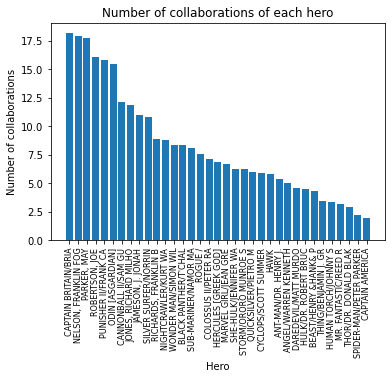

In [333]:
# Sort the dictionary in descending order by the collaboration count
sorted_collaboration_counts = {k: v for k, v in sorted(collab.items(), key=lambda item: item[1], reverse=True)}

# Get the hero names and collaboration counts from the sorted dictionary
heroes = list(sorted_collaboration_counts.keys())
counts = list(sorted_collaboration_counts.values())

# Plot the collaboration counts of the heroes
plt.bar(heroes, counts)
plt.xlabel('Hero')
plt.ylabel('Number of collaborations')
plt.title('Number of collaborations of each hero')


# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.show()

### A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)

In [260]:
appearances = my_dict2['comic_appearances_total'] 

In [261]:
sorted_comic_appearances = {k: v for k, v in sorted(appearances.items(), key=lambda item: item[1], reverse=True)}

In [270]:
# Get the comic names and hero appearances from the sorted dictionary
comics = list(sorted_comic_appearances.keys())[:30]
counts = list(sorted_comic_appearances.values())[:30]

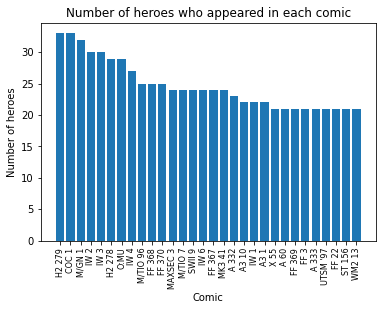

In [271]:
plt.bar(comics, counts)
plt.xlabel('Comic')
plt.ylabel('Number of heroes')
plt.title('Number of heroes who appeared in each comic')
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.show()

### A plot depicting the degree distribution of the network

In [334]:
degree_distribution1 = my_dict1['degree_distribution'] 

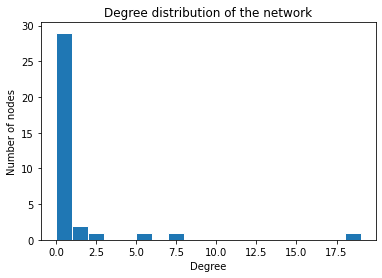

In [335]:
# Plot the degree distribution of the graph
plt.hist(degree_distribution1, bins=range(min(degree_distribution1), max(degree_distribution1)+1), edgecolor='white')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of the network')

# Show the plot
plt.show()

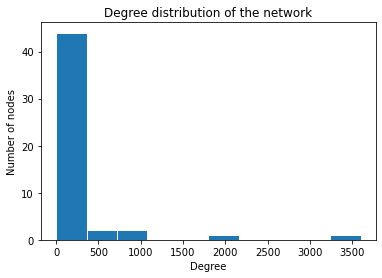

In [287]:
degree_distribution2 = my_dict2['degree_distribution']
# Plot the degree distribution of the graph
plt.hist(degree_distribution2[:50], edgecolor='white')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of the network')

# Show the plot
plt.show()

## Visualization 2 - Visualize centrality measure
A table containing the information related to the requested centrality measure for:
- The average of the requested centrality measure for all of the network's nodes
- The requested centrality measure's value for the given node

In [111]:
def visualize2(G, node, metric, N= None):
    df, node_value = functionality_2(G, node, metric, N)
    node_value = node_value.values[0][0]
    average = df.mean()[0]
    result = pd.DataFrame( data = [[average, node_value]], columns = ["Average", node])
    result.index = [metric]
    return result
    

In [112]:
visualize2(G1, 'CAPTAIN AMERICA', "degreecentrality", 100)

,Average,CAPTAIN AMERICA
degreecentrality,0.765823,1.0


As requested here we can see the average of requested centrality measure for all of the network's nodes and the requested centrality measures's value for the given node. In this example we can notice that CAPTAIN AMERICA has a value of degree centrality greater than the average.

**We can try the same query on the second graph:**

In [113]:
visualize2(G2, 'CAPTAIN AMERICA', "degreecentrality", 100)

,Average,CAPTAIN AMERICA
degreecentrality,0.000681,0.126135


In this example we can notice that CAPTAIN AMERICA has a value of degree centrality greater than the average, but lower than value computed on the first graph. We have to remember that the second graph also contains the comics as nodes which are a lots.

**Let's try some other examples:**

In [114]:
visualize2(G1, "BLACK PANTHER/T'CHAL", "degreecentrality", 100)

,Average,BLACK PANTHER/T'CHAL
degreecentrality,0.765823,0.860759


In the table above we can see the average degreecentrality using the information of top 100 heroes on the first graph. We can notice that Black Panther has a value of degree centrality greater than the average.

In [115]:
visualize2(G1, "BLACK PANTHER/T'CHAL", "betweeness", 100)

,Average,BLACK PANTHER/T'CHAL
betweeness,0.027231,0.0


Instead, here we can state that the betweeness centrality value of Black Panther is lower than average on all the graph conerning the top 100 heroes.

## Visualization 3 - Visualize the shortest-ordered route
- Print the comics in the shortest walk in order
- Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)

['MAXSEC:DP', 'UX 17', 'FF 72', 'FF3 4', 'FF3 4', 'ASM 1', 'DHKF 22/2', 'DHKF 16/3', 'FF3 37', 'CA 383', 'CA 383', 'A 10', 'UX 141', 'PHOENIX 1', 'A 101', 'IM3 4']


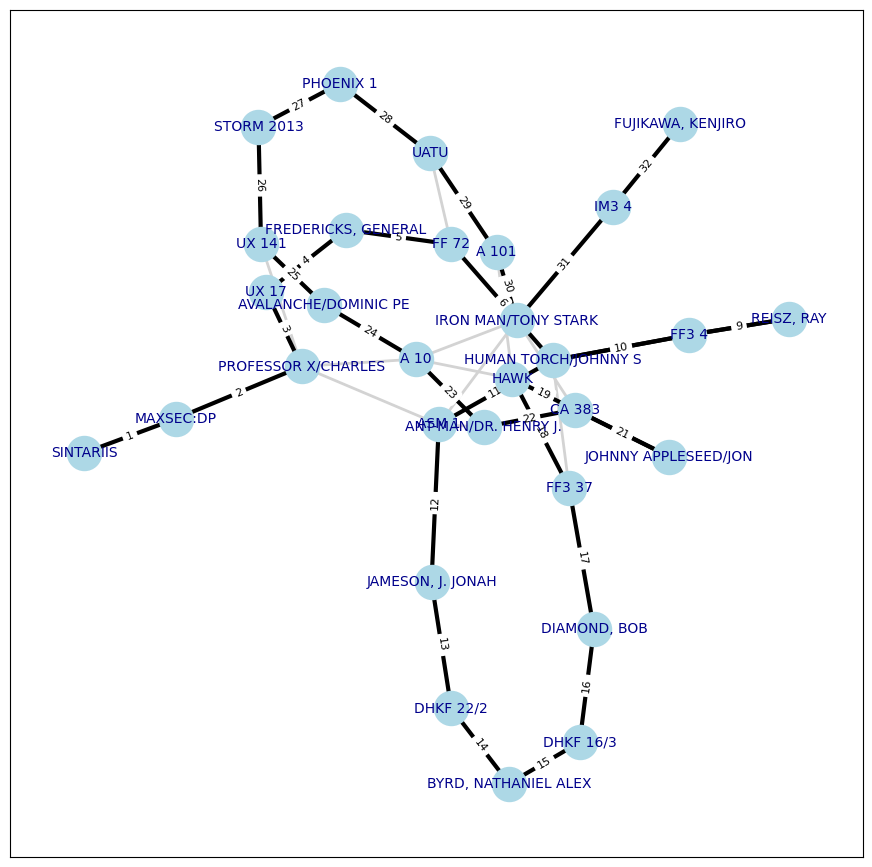

(['SINTARIIS',
  'MAXSEC:DP',
  'PROFESSOR X/CHARLES',
  'UX 17',
  'FREDERICKS, GENERAL',
  'FF 72',
  'HUMAN TORCH/JOHNNY S',
  'FF3 4',
  'REISZ, RAY',
  'FF3 4',
  'HUMAN TORCH/JOHNNY S',
  'ASM 1',
  'JAMESON, J. JONAH',
  'DHKF 22/2',
  'BYRD, NATHANIEL ALEX',
  'DHKF 16/3',
  'DIAMOND, BOB',
  'FF3 37',
  'HAWK',
  'CA 383',
  'JOHNNY APPLESEED/JON',
  'CA 383',
  'ANT-MAN/DR. HENRY J.',
  'A 10',
  'AVALANCHE/DOMINIC PE',
  'UX 141',
  'STORM 2013',
  'PHOENIX 1',
  'UATU',
  'A 101',
  'IRON MAN/TONY STARK',
  'IM3 4',
  'FUJIKAWA, KENJIRO'],
 ['MAXSEC:DP',
  'UX 17',
  'FF 72',
  'FF3 4',
  'FF3 4',
  'ASM 1',
  'DHKF 22/2',
  'DHKF 16/3',
  'FF3 37',
  'CA 383',
  'CA 383',
  'A 10',
  'UX 141',
  'PHOENIX 1',
  'A 101',
  'IM3 4'])

In [10]:
functionality_3(G2, h_1, h_n, h)

## Visualization 4 - Visualize the disconnected graph

We anticipate seeing the Functionality 4 report in Visualization 4. To be more specific, we expect you to have the following report format:

- Print the number of the links that should be disconnected
- Plot the original graph
- Plot the graph after removing the links and identify the two nodes

In [23]:
df_hero =  pd.read_csv('final-hero-network2.csv')

In [24]:
# print the number of the links that should be disconnected

cut_value, g_a, g_b = functionality_4(G=G1, heroA='THOR/DR. DONALD BLAK', heroB='CAPTAIN AMERICA', N=15)
print(f'Number of links to be disconnected: {cut_value}')

Number of links to be disconnected: 8


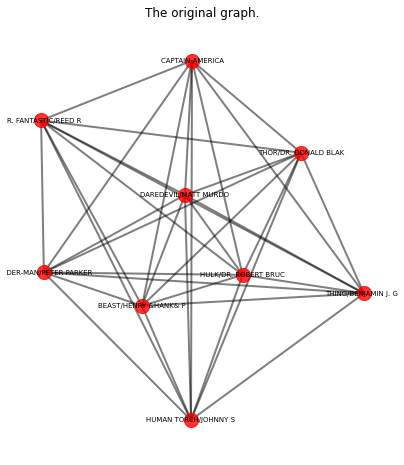

In [25]:
# plot the original graph
N = 15
if N is None:
    G_sub = G1
else:
    G_sub = nx.subgraph(G1, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                        list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared

node_color_list = [nc for _, nc in G_sub.nodes(data="node_color")]
pos = nx.spring_layout(G_sub)
plt.figure(figsize=(7, 8))
nx.draw_networkx_edges(G_sub, pos, alpha=0.5, width=2, edge_color="k")
nx.draw_networkx_nodes(G_sub, pos, alpha=0.8, node_color='red', node_size=200)
nx.draw_networkx_labels(G_sub, pos, font_size=7)
plt.axis("off")
plt.title("The original graph.")
plt.show()

From the original graph we can better visualize the results of the following graph after removing the links and identify better the two nodes. As we have seen from the print the number of the links that should be disconnected is equal to 8 and leaves the node of Captain America alone.

['SPIDER-MAN/PETER PARKER', 'MR. FANTASTIC/REED R', 'HUMAN TORCH/JOHNNY S', 'THOR/DR. DONALD BLAK', 'HULK/DR. ROBERT BRUC', 'DAREDEVIL/MATT MURDO', 'BEAST/HENRY &HANK& P', 'THING/BENJAMIN J. GR']
['CAPTAIN AMERICA']


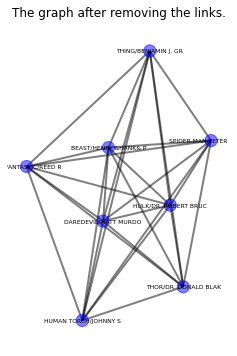

In [26]:
# plot the graph after removing the links and identify the two nodes
# Find the minimum number of links required to disconnect the graph
cut_value, g_a, g_b = functionality_4(G=G1, heroA='THOR/DR. DONALD BLAK', heroB='CAPTAIN AMERICA', N=15)

# Get the nodes of the two subgraphs
nodes_a = list(g_a.nodes())
nodes_b = list(g_b.nodes())
print(nodes_a)
print(nodes_b)
# Create a list of node colors
node_color_list = ['b' if node in nodes_a else 'r' if node in nodes_b else 'k' for node in g_a.nodes()]
pos = nx.spring_layout(g_a)
plt.figure(figsize=(4, 6))
nx.draw_networkx_edges(g_a, pos, alpha=0.5, width=2, edge_color="k")
nx.draw_networkx_nodes(g_a, pos, alpha=0.5, node_color=node_color_list, node_size=150)
nx.draw_networkx_labels(g_a, pos, font_size=6)
plt.axis("off")
plt.title("The graph after removing the links.")
plt.show()

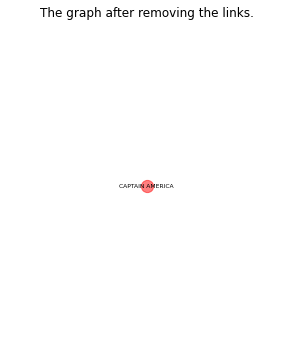

In [27]:
# Create a list of node colors
node_color_list = ['b' if node in nodes_a else 'r' if node in nodes_b else 'k' for node in g_b.nodes()]
pos = nx.spring_layout(g_b)
plt.figure(figsize=(5, 6))
nx.draw_networkx_edges(g_b, pos, alpha=0.5, width=2, edge_color="k")
nx.draw_networkx_nodes(g_b, pos, alpha=0.5, node_color=node_color_list, node_size=150)
nx.draw_networkx_labels(g_b, pos, font_size=6)
plt.axis("off")
plt.title("The graph after removing the links.")
plt.show()

## Visualization 5 - Visualize the communities

We anticipate seeing the Functionality 5 report in Visualization 5. To be more specific, we expect you to have the following report format:

- Print the number of links that should be removed to have the communities
- A table depicting the communities and the heroes that belong to each community
- Plot the original graph
- Plot the graph showing the communities in the network
- Plot the final graph and identify the community/communities of Hero_1 and Hero_2

Notes:

- For the final output of your function, please set the Hero_1 to 'Captain America' and Hero_2 to 'Ironman' and show the results
- If Hero_1 and Hero_2 belong to the same community, identify that community; otherwise, identify those two communities that these heroes belong to.

 Print the number of links that should be removed to have the communities

2452 already resulted from cut_size of the function extract communities

In [84]:
# A table depicting the communities and the heroes that belong to each community
N = 80
if N is None:
    G_sub = G1
else:
    G_sub = nx.subgraph(G1, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                        list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared

    # Find the communities in the graph using the Louvain algorithm
partition = com.best_partition(G_sub, resolution=0.8)
# Create a list of communities, where each community is a list of nodes that belong to it
communities = defaultdict(list)
for node, community in partition.items():
    communities[community].append(node)
comm = list(communities.values())
# Create a dataframe with the communities and the heroes that belong to each community
df = pd.DataFrame(columns=['Community', 'Heroes'])
for i, c in enumerate(comm):
    df.loc[i] = [i, c]

# Display the table
print(df)

   Community                                             Heroes
0          0  [NORRISS, SISTER BARB, WONDER MAN/SIMON WIL, N...
1          1  [SPIDER-MAN/PETER PARKER, BANNER, BETTY ROSS T...
2          2  [LEEDS, BETTY BRANT, CAPTAIN AMERICA, STORM/OR...
3          3  [MR. FANTASTIC/REED R, HUMAN TORCH/JOHNNY S, C...
4          4  [MARVEL GIRL/JEAN GRE, LOKI [ASGARDIAN], ROGUE...
5          5        [KINGPIN/WILSON FISK, THING/BENJAMIN J. GR]
6          6                             [HULK/DR. ROBERT BRUC]


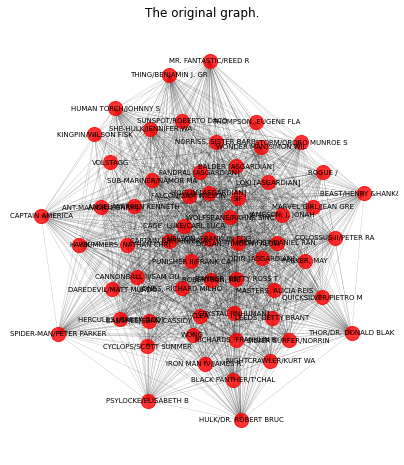

In [85]:
# plot the original graph
N = 80
if N is None:
    G_sub = G1
else:
    G_sub = nx.subgraph(G1, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                        list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared

node_color_list = [nc for _, nc in G_sub.nodes(data="node_color")]
pos = nx.spring_layout(G_sub)
plt.figure(figsize=(7, 8))
nx.draw_networkx_edges(G_sub, pos, alpha=0.5, width=0.2, edge_color="k")
nx.draw_networkx_nodes(G_sub, pos, alpha=0.8, node_color='red', node_size=200)
nx.draw_networkx_labels(G_sub, pos, font_size=7)
plt.axis("off")
plt.title("The original graph.")
plt.show()

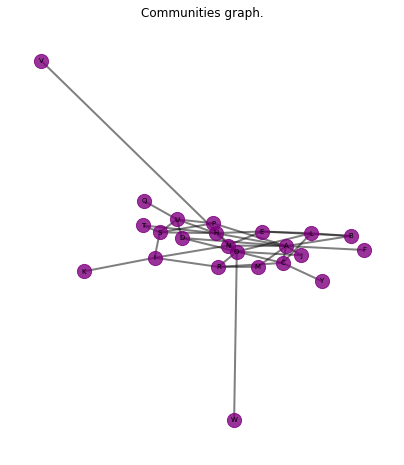

In [86]:
# Plot the graph showing the communities in the network from the dataframe df
N = 80
if N is None:
    G_sub = G1
else:
    G_sub = nx.subgraph(G1, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                        list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared

# Find the communities in the graph using the Louvain algorithm
partition = com.best_partition(G_sub, resolution=0.8)

G = nx.Graph()
for k, v in partition.items():
    G.add_edge(k[0], k[1], weight=v)

node_color_list = [nc for _, nc in G.nodes(data="node_color")]
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 8))
handles___ = {k: f"#{token_hex(4)}" for k in partition.keys()}
handles___ = dict(sorted(handles___.items()))
handles_dict = {patches.Patch(color=k, label=v) for k, v in zip(handles___.values(), partition.values())}
nx.draw_networkx_edges(G, pos, alpha=0.5, width=2, edge_color="k")
nx.draw_networkx_nodes(G, pos, alpha=0.8, node_color='purple', node_size=200)
nx.draw_networkx_labels(G, pos, font_size=7)
plt.axis("off")
plt.title("Communities graph.")
plt.show()

In [87]:
# Plot the final graph and identify the community/communities of Hero_1 and Hero_2 set the Hero_1 to 'Captain America' and Hero_2 to 'Ironman' and show the results. If Hero_1 and Hero_2 belong to the same community, identify that community; otherwise, identify those two communities that these heroes belong to.
hero_1='CAPTAIN AMERICA'
hero_2='IRON MAN IV/JAMES R.'
cut_size, communities = functionality_5(G1, 80, hero_1, hero_2)

Hero_1 and Hero_2 do not belong to the same community


In [89]:
def find_community(hero, communities):
    for community, nodes in communities.items():
        if hero in nodes:
            return community
    return -1

hero_1_community = find_community(hero_1, communities)
hero_2_community = find_community(hero_2, communities)
print(f"{hero_1} is in community {hero_1_community}")
print(f"{hero_2} is in community {hero_2_community}")

CAPTAIN AMERICA is in community 5
IRON MAN IV/JAMES R. is in community 0


Text(0.5, 1.0, 'Final graph.')

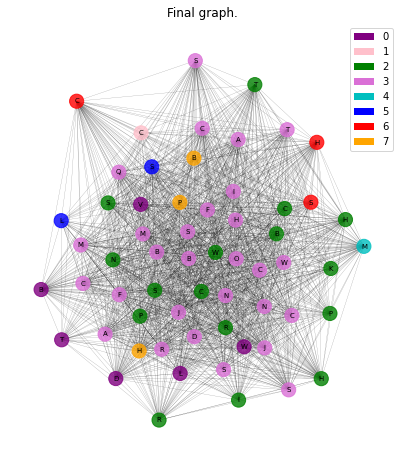

In [96]:
communities = defaultdict(list)
for node, community in partition.items():
    communities[community].append(node)
node_labels = {node: community for node, community in partition.items()}

colors = {0: 'purple', 1: 'pink', 2: 'g', 3: 'orchid', 4: 'c', 5:'b', 6:'r', 7:'orange'}
legend_dict = {}
for community, nodes in communities.items():
    legend_dict[community] = colors[community]
node_colors = [colors[node_labels[node]] for node in G_sub.nodes()]
pos = nx.spring_layout(G_sub)
plt.figure(figsize=(7, 8))
nx.draw_networkx_nodes(G_sub, pos, alpha=0.8, node_color=node_colors, node_size=200)
nx.draw_networkx_edges(G_sub, pos, alpha=0.5, width=0.2, edge_color="k")
nx.draw_networkx_labels(G_sub, pos, font_size=7, labels={node: node[0] for node in G_sub.nodes()})
# Create a legend for the node colors
legend_elements = [Patch(facecolor=color, label= label) for label, color in sorted(legend_dict.items())]
plt.legend(handles=legend_elements, bbox_to_anchor=(1,1))
plt.axis("off")
plt.title("Final graph.")

At the end, from this graph, we can deduct that CAPTAIN AMERICA is found in the community 5 (blue) and IRON MAN IV/JAMES R. is in community 0 (purple)

# Bonus - PageRank on MapReduce
PageRank and MapReduce go well together, and this synergy was essential for Google's growth and the MapReduce paradigm's proliferation. Therefore, for the bonus section of this homework, we ask that you implement the PageRank algorithm using the MapReduce paradigm

We implement this function with pyspark 

In [ ]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext

Parameters:
- G: a NetworkX graph object
- n_iterations: the number of iterations to run the algorithm (default: 10)
- damping_factor: the damping factor to use in the algorithm (default: 0.85)
    
Returns:
- ranks: a dictionary of the PageRank values for each node in the graph


The damping factor is a parameter used in the PageRank algorithm to represent the probability that a user will continue to follow the links on a page, rather than randomly jumping to any page on the internet. It is usually set to a value between 0 and 1, with a value closer to 1 indicating that users are more likely to continue following the links on a page, and a value closer to 0 indicating that users are more likely to randomly jump to other pages. Itis used to prevent the PageRank values from becoming too large or too small, as well as to prevent the algorithm from getting stuck in an infinite loop. It allows the PageRank values to converge to a stable value over time, rather than oscillating between large and small values.

It's typically set to a value of 0.85, which has been found to work well in practice. 

In [ ]:
def pagerank(G, n_iterations=10, damping_factor=0.85):

    # Create a SparkContext object
    sc = SparkContext.getOrCreate()
    
    # Convert the graph to an RDD of edges
    edges = sc.parallelize(G.edges())
    
    # Initialize the PageRank values for each node to 1.0
    ranks = sc.parallelize(G.nodes()).map(lambda x: (x, 1.0))
    
    # Iterate over the RDD and update the PageRank values
    for i in range(n_iterations):
        # Compute the contributions of each node to the PageRank of its neighbors
        contributions = edges.join(ranks).flatMap(
            lambda x: [(x[1][0], x[1][1] / len(x[1][0])), (x[0], 0)]
        )
        
        # Compute the new PageRank values
        ranks = contributions.reduceByKey(lambda x, y: x + y).map(
            lambda x: (x[0], (1 - damping_factor) + damping_factor * x[1])
        )
    
    # Convert the RDD to a list and return it
    ranks = ranks.collect()
    return ranks


In [ ]:
ranks2 = pagerank2(G2, n_iterations=10, damping_factor=0.85)


In [156]:
ranks2[:100]

[('H2 252', 0.17125),
 ('SLOAN, FRED', 1.1274623747750443),
 ('ARCANNA/ARCANNA JONE', 0.3026084269987689),
 ('Q 16', 0.181875),
 ('SWII 7', 0.17125),
 ('ETERNITY/ADAM QADMON', 0.7914741783322882),
 ('PHOENIX III/RACHEL S', 1.8716183551782977),
 ('ABOMINATION | MUTANT', 0.15000000000000002),
 ('XFOR 53', 0.16821428571428573),
 ('ASM 283', 0.16909805803571432),
 ('DAREDEVIL/MATT MURDO', 5.960875070271507),
 ('DD 1', 0.18342160156250004),
 ('BULLDOZER/HENRY CAMP', 0.40399151382797155),
 ('M/SHSW 2', 0.16671080078125003),
 ('MR. FANTASTIC/REED R', 27.528032714187233),
 ('ULTRON', 4.5551354658751215),
 ('T2 14', 0.17673728125000002),
 ('FANDRAL [ASGARDIAN]', 2.16527524663037),
 ('ULIK', 5.313439048551903),
 ('T 8', 0.19250000000000003),
 ('ROM 63', 0.17125),
 ('ROM, SPACEKNIGHT', 1.2385678021704334),
 ('BP3 27', 0.17682089861717998),
 ("T'CHAKA", 0.264751643689254),
 ('T2 10', 0.17550000000000002),
 ('ADVA', 0.15000000000000002),
 ('UX 187', 0.17125),
 ('DRSTR3 49', 0.16416666666666668),
 (

**From the file we know that M is sparse, so we apply pagerank on G2, because it's sparse.**

# 6. Algorithmic Question
Alex and Sarah have been together for two years, and Alex is now thinking about proposing to her. But, to surprise her, he wants to install an app on her phone that asks her if she will marry him at the right time.

However, to install the application secretly, he needs her phone's password, which he does not have. He knows her password is a poly-line made up of vertical or horizontal line segments. In a 3*3 grid, each line segment connects the centres of two cells. Alex learned the direction of each line segment by looking at her hand while unlocking her phone. He didn't pay much attention to the length of each line segment, but he is sure that her phone's operating system does not allow the poly-line to intersect with itself even at one point.

Alex wants to distract Sarah's attention long enough to test all possible patterns based on the directions of the line segments he has learned. Therefore, he needs you to assist him in calculating how many possible patterns he has to try based on those directions to estimate how much time he needs to check all of those possibilities. Given that the line segments were directed right, down, left, and up, the following figure depicts two valid and one invalid (as the poly-lines should not intersect even in one point) patterns.


**Input:**

- The input is a single string that shows the direction of the segment lines and contains only the characters R, L, U, and D, which correspond to the Right, Left, Up, and Down directions. The string's maximum length is 10. It is also guaranteed that two consecutive characters will be different.

**Ouput:**

- We expect to see only 1 number in the output, corresponding to the number of different patterns that can be generated based on the line segments Alex learned. In some cases, this number may be 0, indicating that no patterns can be generated using the learned line segments.

In [130]:
class Unlock:
    
    def __init__(self):
        """
            Method to initialize the object of class Unlock, which has an attribute start
            containing all the possible starting positions for each move. This attribute 
            is a dictionary where the keys are the valid moves and the values are list of 
            tuples formed by 2 numbers that indicates the row and column of the specific 
            element in the 3*3 grid representing the phone locker
        """
        
        self.start  = { "R": [(0 , 0) , (0 , 1) , (1 , 0) , (1 , 1) , (2 , 0) , (2 , 1)] , # starting positions for right move
                    "L": [(0 , 1) , (0 , 2) , (1 , 1) , (1 , 2) , (2 , 1) , (2 , 2)] ,     # starting positions for left move
                    "U": [(1 , 0) , (1 , 1) , (1 , 2) , (2 , 0) , (2 , 1) , (2 , 2)] ,     # starting positions for up move
                    "D": [(0 , 0) , (0 , 1) , (0 , 2) , (1 , 0) , (1 , 1) , (1 , 2)]}      # starting positions for down move
    
    def solve(self, string):
        """
          Principal method of the class. It recalls the other methods to build paths
          and check the admissibility of the patterns.
        
        - input: a single string that shows the direction of the segment lines
        - output: number corrisponding to the number odf different patterns that 
                  can be generated based on the line segments Alex learned
        """
        different_paths = [string[0], string[0]*2] # we initialize the list of all paths with the first two combinations of the first character
        
        for character in string[1:]:          # looping over the other characters of the string
             different_paths = self.build_paths(different_paths , character) # overwrite the list of differents paths with the updated one  
        
        n_ways = 0                            # initialize the counter the save the number of possible ways to unlock the phone with the given string
        for start in self.start[string[0]]:   # looping over all the possible start positions using the attribute start
            for path in different_paths:      # looping over all the  different paths  
                if self.isAdmissible(start , path) == True:  # checking if the are respected the conditions to consider a pattern valid 
                    n_ways += 1               # add one to the number of possible ways
        return n_ways                         # return the number of patterns to unlock the phone
        
        
    def check_input(self,string):
        """
           Method to verify the correctness of the input. The conditions to respect are:
           - string's maximum length is 10
           - the only correct moves are in (R,L,U,D)
           - two equal consecutive characters are not allowed
           
           - input: a single string that shows the direction of the segment lines
           - output: raise an exception or just a string with a positive message
        """
        
        if len(string) > 10:
            return ("Insert a string with maximum length equal to 10")
            
        for char in string:
            if char not in self.start:
                return ("Insert a valid string. This string contains a move not contained in (R,L,U,D)")
            
        for pos in range(1, len(string)):
            if string[pos] == string[pos-1]:
                return ("Insert a valid string. This string contains 2 equal consecutive characters")
                
        return "The input string is valid, you can use the method 'solve' to calculate the number of patterns"                   
         
        
        
    def build_paths(self, different_paths, character):
        new_different_paths = list()       # Pre-set the path
        for tmp in different_paths:  # Loop over all the sub_path
            for times in range(1,3):  # We can at most twice
                new_different_paths.append( tmp + character*times)   # Append the sub_path
        return new_different_paths   

        
    def isAdmissible(self, pos, path_moves):
        """
           Method the
        """
        pattern = [pos]
        for move in path_moves:            # looping over the path moves
            if move == "R":                 # move right
                pos = (pos[0] , pos[1] + 1) # change the position
            elif move == "L":               # move left
                pos = (pos[0] , pos[1] - 1) # change the position
            elif move == "D":               # move down 
                pos = (pos[0] + 1, pos[1])  # change the position
            elif move == "U":               # move up 
                pos = (pos[0] - 1, pos[1]) # change the position
            # Condition to be inside the matrix
            if pos in pattern or pos[0] < 0 or pos[0] > 2 or pos[1] < 0 or pos[1] > 2: 
           # checking not intersection               # checking not out of matrix
                return False   
            else:
                pattern.append(pos)
        return True
    
    
    

In [131]:
solver = Unlock()

### First trial

In [132]:
solver.check_input("DRU")

"The input string is valid, you can use the method 'solve' to calculate the number of patterns"

In [133]:
solver.solve("DRU")

15

### Second trial

In [121]:
solver.check_input("R")

"The input string is valid, you can use the method 'solve' to calculate the number of patterns"

In [122]:
solver.solve("R")

9

### Third trial

In [123]:
solver.check_input("LDRDRUL")

"The input string is valid, you can use the method 'solve' to calculate the number of patterns"

In [124]:
solver.solve("LDRDRUL")

0

### Check if the string is not valid

In [134]:
solver.check_input("LDRD6TDYRUL")

'Insert a string with maximum length equal to 10'